## `K-Means - Loïc et Bertrand - Détails de l'algorithme`

K-means est un algorithme __non supervisé__ de clustering __non hiérarchique__. Il permet de regrouper en K-clusters distincts les observations d'un data set à n-dimensions. Ainsi les données similaires se retrouveront  dans un même cluster.

Voyons le dataset suivants composé de 300 échantillons qui comportent 2 caractéristiques (représenté en 2 dimensions par une abscisse et une ordonnée) :

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=300, centers=3, n_features=2, cluster_std=0.85)

In [3]:
print(X.shape, y.shape)

(300, 2) (300,)


In [4]:
data = pd.DataFrame(data={'Coord_x':X[:,0], 'Coord_y':X[:,1], 'labels':y, 'centroide':0})

In [5]:
data.to_csv('data_kmeans.csv')

In [6]:
data.head()

Coord_x   Coord_y  labels  centroide
0  5.759889 -0.754167       0          0
1 -8.304434 -4.697845       1          0
2  9.224155  4.791397       2          0
3 -7.025151 -3.985180       1          0
4  4.758659 -0.550312       0          0

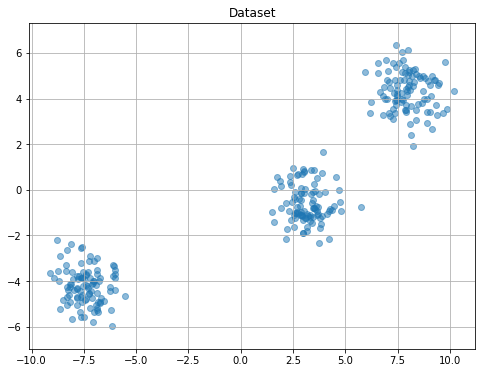

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1], alpha=0.5)
plt.title('Dataset')
plt.xlim([min(X[:,0])-1,max(X[:,0])+1])
plt.ylim([min(X[:,1])-1,max(X[:,1])+1])
plt.grid()
plt.show()

Nous remarquons avec notre cerveau d'humain que les données peuvent être aisément regroupées en trois clusters.

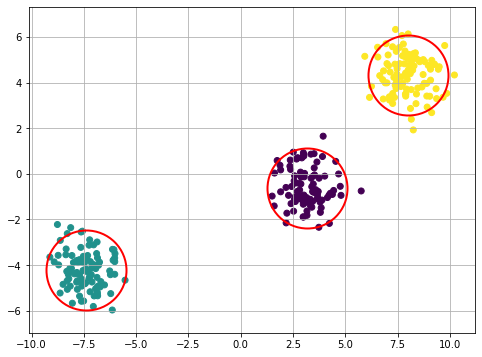

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1], alpha=1, c=y)
plt.xlim([min(X[:,0])-1,max(X[:,0])+1])
plt.ylim([min(X[:,1])-1,max(X[:,1])+1])
plt.plot(np.mean(data[data.labels == 0].Coord_x),np.mean(data[data.labels == 0].Coord_y), 'o', ms=20 * 4, mec='red', mfc='none', mew=2)
plt.plot(np.mean(data[data.labels == 1].Coord_x),np.mean(data[data.labels == 1].Coord_y), 'o', ms=20 * 4, mec='red', mfc='none', mew=2)
plt.plot(np.mean(data[data.labels == 2].Coord_x),np.mean(data[data.labels == 2].Coord_y), 'o', ms=20 * 4, mec='red', mfc='none', mew=2)
plt.grid()
plt.show()

Le but désormais est de rendre cette tâche automatique, et pourquoi pas sur un nombre de dimensions supérieur à 3 (qu'il est difficile de représenter visuellement pour le cerveau d'un humain)

Pour la suite de l'exemple nous resterons sur un espace à deux dimensions avec ces données.

### Fonctionnement en détails

On commence par placer au hasard trois points, puis on calcule la distance entre chaque points et chaque centroide.

In [9]:
random.seed(12)
centroides = []
for i in range(3):
    x = random.uniform(min(X[:,0]),max(X[:,0]))
    y = random.uniform(min(X[:,1]),max(X[:,1]))
    centroides.append([x,y])
centroides = np.array(centroides)

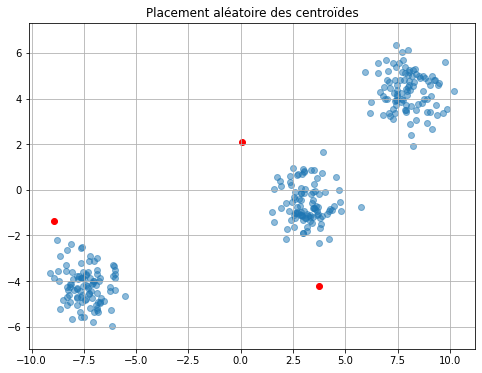

In [10]:
plt.figure(figsize=(8,6))
plt.title('Placement aléatoire des centroïdes')
plt.scatter(X[:,0],X[:,1], alpha=0.5)
plt.scatter(centroides[:,0],centroides[:,1], c='r')
plt.xlim([min(X[:,0])-1,max(X[:,0])+1])
plt.ylim([min(X[:,1])-1,max(X[:,1])+1])
plt.grid()
plt.show()

In [11]:
for i in range(len(X)):
    distances = [] 
    for j in range(len(centroides)):
        euclidean = np.sqrt((X[i,0]-centroides[j,0])**2 + (X[i,1]-centroides[j,1])**2)
        distances.append(euclidean)
    data.centroide[i] = distances.index(min(distances))

On attribue pour chaque point, un centroïde (le plus proche)

In [12]:
data.head()

Coord_x   Coord_y  labels  centroide
0  5.759889 -0.754167       0          1
1 -8.304434 -4.697845       1          2
2  9.224155  4.791397       2          0
3 -7.025151 -3.985180       1          2
4  4.758659 -0.550312       0          1

On trace les distances entre chaque point et le centroïde le plus proche.

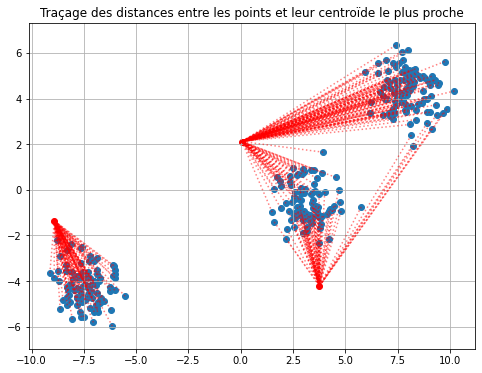

In [13]:
plt.figure(figsize=(8,6))
plt.title('Traçage des distances entre les points et leur centroïde le plus proche')
plt.scatter(X[:,0],X[:,1])
plt.scatter(centroides[:,0],centroides[:,1], c='r')
plt.xlim([min(X[:,0])-1,max(X[:,0])+1])
plt.ylim([min(X[:,1])-1,max(X[:,1])+1])
for i in range(len(X)):
    plt.plot([X[i,0],centroides[data.centroide[i],0]],[X[i,1],centroides[data.centroide[i],1]], ':', c='r', alpha=0.5)
plt.grid()
plt.show()

Ici, chaque point se retrouve connecté à son centroïde

Maintenant nous calculons la distance entre chaque point et son centroïde respectif. Puis nous faisons la somme de toutes ces distances.

In [14]:
all_distances = []

In [15]:
distance_totale = 0.0
for i in range(len(X)):
    distance_per_point = np.sqrt((X[i,0]-centroides[data.centroide[i],0])**2 + (X[i,1]-centroides[data.centroide[i],0])**2)
    distance_totale += distance_per_point
all_distances.append(distance_totale)
print(distance_totale)

1790.782103764969


On récupère les coordonnées du centre de gravité de chaque cluster identifié qu'on attribue aux centroïdes (on déplace les centroïdes à ces centres de gravité)

In [16]:
for i in range(len(centroides)):
    centroides[i,0] = np.mean(data[data.centroide == i].Coord_x)
    centroides[i,1] = np.mean(data[data.centroide == i].Coord_y)

In [17]:
centroides

array([[ 6.4214276 ,  3.21885775],
       [ 3.93833407, -0.70847155],
       [-7.40958654, -4.21463941]])

On affiche le résultat

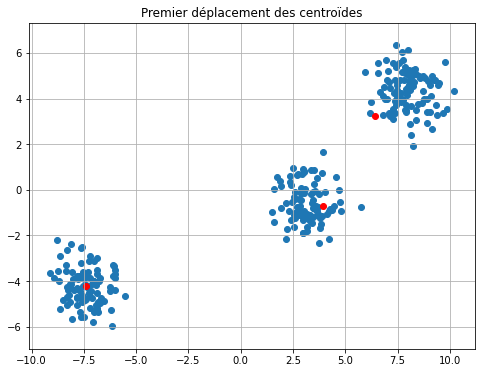

Coord_x   Coord_y  labels  centroide
0  5.759889 -0.754167       0          1
1 -8.304434 -4.697845       1          2
2  9.224155  4.791397       2          0
3 -7.025151 -3.985180       1          2
4  4.758659 -0.550312       0          1

In [18]:
plt.figure(figsize=(8,6))
plt.title('Premier déplacement des centroïdes')
plt.scatter(X[:,0],X[:,1])
plt.scatter(centroides[:,0],centroides[:,1], c='r')
plt.xlim([min(X[:,0])-1,max(X[:,0])+1])
plt.ylim([min(X[:,1])-1,max(X[:,1])+1])
plt.grid()
plt.show()
data.head()

On recalcule à nouveau la distance totale

In [19]:
distance_totale = 0.0
for i in range(len(X)):
    distance_per_point = np.sqrt((X[i,0]-centroides[data.centroide[i],0])**2 + (X[i,1]-centroides[data.centroide[i],0])**2)
    distance_totale += distance_per_point
all_distances.append(distance_totale)
print(distance_totale)

1198.6832966295908


On remarque que la distance totale a diminué.

In [20]:
all_distances

[1790.782103764969, 1198.6832966295908]

On recommence, on attribue à nouveau pour chaque point, un centroïde (le plus proche)

In [21]:
for i in range(len(X)):
    distances = [] 
    for j in range(len(centroides)):
        euclidean = np.sqrt((X[i,0]-centroides[j,0])**2 + (X[i,1]-centroides[j,1])**2)
        distances.append(euclidean)
    data.centroide[i] = distances.index(min(distances))

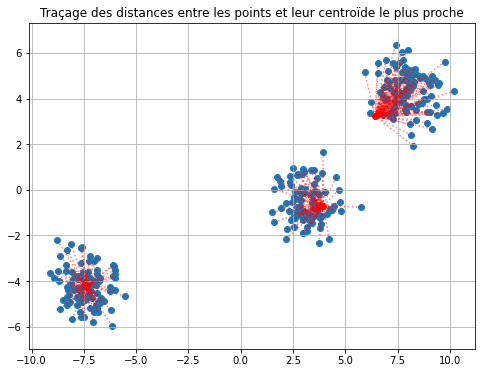

In [22]:
plt.figure(figsize=(8,6))
plt.title('Traçage des distances entre les points et leur centroïde le plus proche')
plt.scatter(X[:,0],X[:,1])
plt.scatter(centroides[:,0],centroides[:,1], c='r')
plt.xlim([min(X[:,0])-1,max(X[:,0])+1])
plt.ylim([min(X[:,1])-1,max(X[:,1])+1])
for i in range(len(X)):
    plt.plot([X[i,0],centroides[data.centroide[i],0]],[X[i,1],centroides[data.centroide[i],1]], ':', c='r', alpha=0.5)
plt.grid()
plt.show()

On récupère les coordonnées du centre de gravité de chaque cluster identifié

In [23]:
for i in range(len(centroides)):
    centroides[i,0] = np.mean(data[data.centroide == i].Coord_x)
    centroides[i,1] = np.mean(data[data.centroide == i].Coord_y)

In [24]:
centroides

array([[ 7.9758359 ,  4.33782977],
       [ 3.15368476, -0.60997149],
       [-7.40958654, -4.21463941]])

Ensuite, on déplace les centroïdes au point de gravité de chaque cluster qu'il leur a été attribué

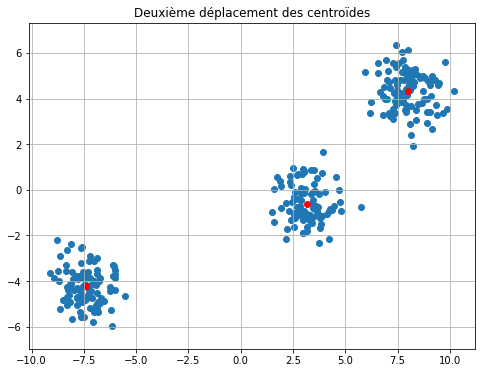

Coord_x   Coord_y  labels  centroide
0  5.759889 -0.754167       0          1
1 -8.304434 -4.697845       1          2
2  9.224155  4.791397       2          0
3 -7.025151 -3.985180       1          2
4  4.758659 -0.550312       0          1

In [25]:
plt.figure(figsize=(8,6))
plt.title('Deuxième déplacement des centroïdes')
plt.scatter(X[:,0],X[:,1])
plt.scatter(centroides[:,0],centroides[:,1], c='r')
plt.xlim([min(X[:,0])-1,max(X[:,0])+1])
plt.ylim([min(X[:,1])-1,max(X[:,1])+1])
plt.grid()
plt.show()
data.head()

On trace les distances... à nouveau...

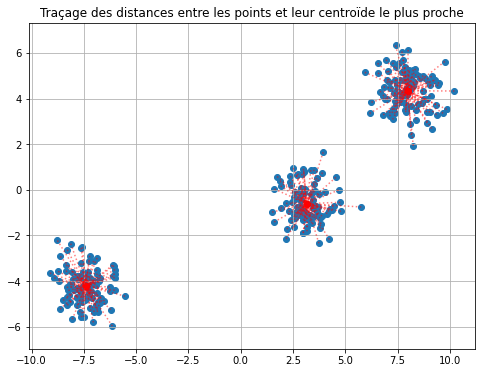

In [26]:
plt.figure(figsize=(8,6))
plt.title('Traçage des distances entre les points et leur centroïde le plus proche')
plt.scatter(X[:,0],X[:,1])
plt.scatter(centroides[:,0],centroides[:,1], c='r')
plt.xlim([min(X[:,0])-1,max(X[:,0])+1])
plt.ylim([min(X[:,1])-1,max(X[:,1])+1])
for i in range(len(X)):
    plt.plot([X[i,0],centroides[data.centroide[i],0]],[X[i,1],centroides[data.centroide[i],1]], ':', c='r', alpha=0.5)
plt.grid()
plt.show()

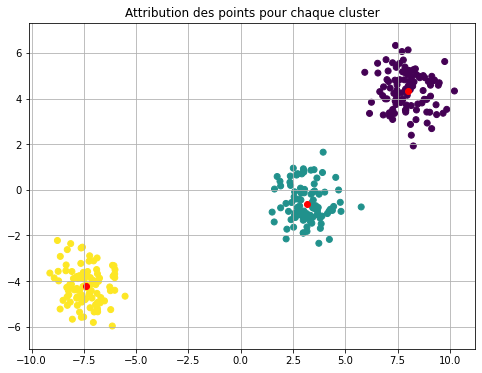

In [27]:
plt.figure(figsize=(8,6))
plt.title('Attribution des points pour chaque cluster')
plt.scatter(X[:,0],X[:,1], c=data.centroide)
plt.scatter(centroides[:,0],centroides[:,1], c='r')
plt.xlim([min(X[:,0])-1,max(X[:,0])+1])
plt.ylim([min(X[:,1])-1,max(X[:,1])+1])
plt.grid()
plt.show()

In [28]:
distance_totale = 0.0
for i in range(len(X)):
    distance_per_point = np.sqrt((X[i,0]-centroides[data.centroide[i],0])**2 + (X[i,1]-centroides[data.centroide[i],0])**2)
    distance_totale += distance_per_point
all_distances.append(distance_totale)
print(distance_totale)

1086.5169193122256


In [29]:
all_distances

[1790.782103764969, 1198.6832966295908, 1086.5169193122256]

On calcule à nouveau la distance totale, et on note que celle-ci a encore diminué...

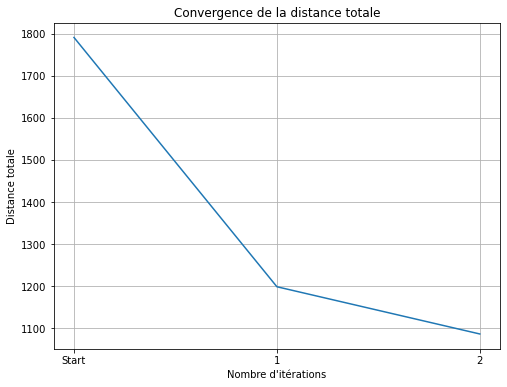

In [33]:
plt.figure(figsize=(8,6))
plt.title('Convergence de la distance totale')
plt.plot(['Start', '1', '2'], all_distances)
plt.ylabel('Distance totale')
plt.xlabel("Nombre d'itérations")
plt.grid()
plt.show()

Pour conclure, cette distance doit converger vers un point le plus bas possible, dans notre cas nous n'avons fait que 2 itérations et nous avons contrôlé graphiquement le résultat, mais dans d'autres cas, nous sommes contraints d'en faire plus jusqu'à la convergence vers un minimum.

Enfin, cette distance totale correspond pour scikit-learn à l'inertie, récupérable via l'attribut __.inertia___ depuis le modèle entraîné qui est égale à la __somme des distances au carré__ des instances à leur centroïde le plus proche.

![Alt Text](https://i.imgur.com/IMDvxND.gif)